In [37]:
from matplotlib import interactive
interactive(True)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

def Ts(s=1368,a=0.3,e=0.7,g=5.67*10**-8):
    return ((((s*(1-a))/(2*g*(2-e)))**(1/4)))-273.15

In [38]:
Ts()

10.744469789271989

In [39]:
Ts(e=0),Ts(e=0.7)

(-18.240939813051966, 10.744469789271989)

In [40]:
from sympy import Symbol
from sympy.solvers import solve
a=np.linspace(0.1, .8, 10)
x = Symbol('x')

def solver_e(a=0.3):
    return solve((((1368*(1-a)/(2*(5.67*10**-8)*(2-x)))**(1/4)))-273.15-15, x)[0]

sol=solver_e()
sol

0.775111415580796

In [41]:
Ts(e=sol)

14.9999999999998

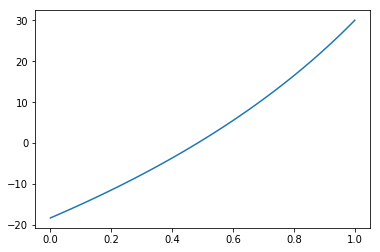

In [42]:
e=np.linspace(0., 1, 80)
plt.plot(e,Ts(e=e))

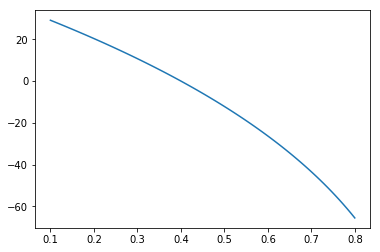

In [43]:
a=np.linspace(0.1, .8, 80)
plt.plot(a,Ts(a=a))

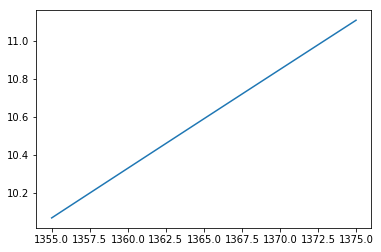

In [44]:
s=np.linspace(1355,1375, 80)
plt.plot(s,Ts(s=s))

In [45]:
saet  = []
for s_ in s:
    for a_ in a:
        for e_ in e:
            saet.append([s_,a_,e_,Ts(s=s_,a=a_,e=e_)])

saet=np.array(saet)        

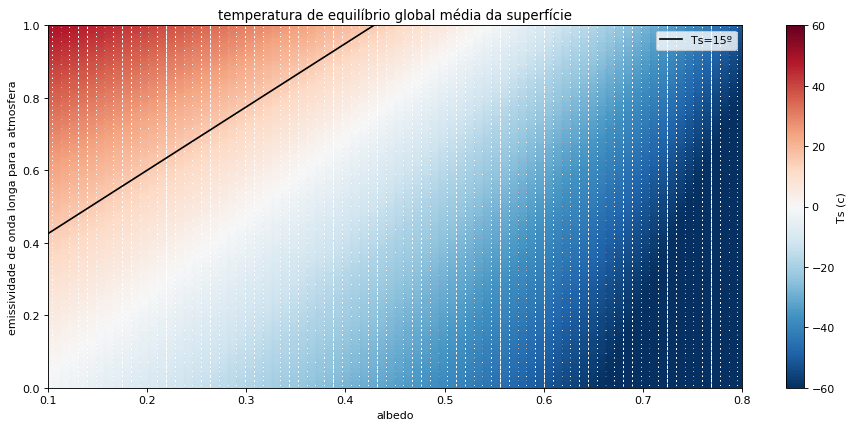

In [46]:
fig=plt.figure(figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')

p = plt.scatter(saet[:,1], saet[:,2], c=saet[:,3],cmap='RdBu_r')
sol_e=[]
for a_ in a:
    sol_e.append(solver_e(a_))
plt.plot(a,sol_e,'k-',label="Ts=15º")
plt.title("temperatura de equilíbrio global média da superfície")
plt.xlabel("albedo")
plt.ylabel("emissividade de onda longa para a atmosfera")
plt.ylim(0,1)
plt.xlim(0.1,.8)
plt.clim(-60,60)
cbar=plt.colorbar(p)
cbar.set_label("Ts (c)", labelpad=+1)
plt.legend()
plt.show()

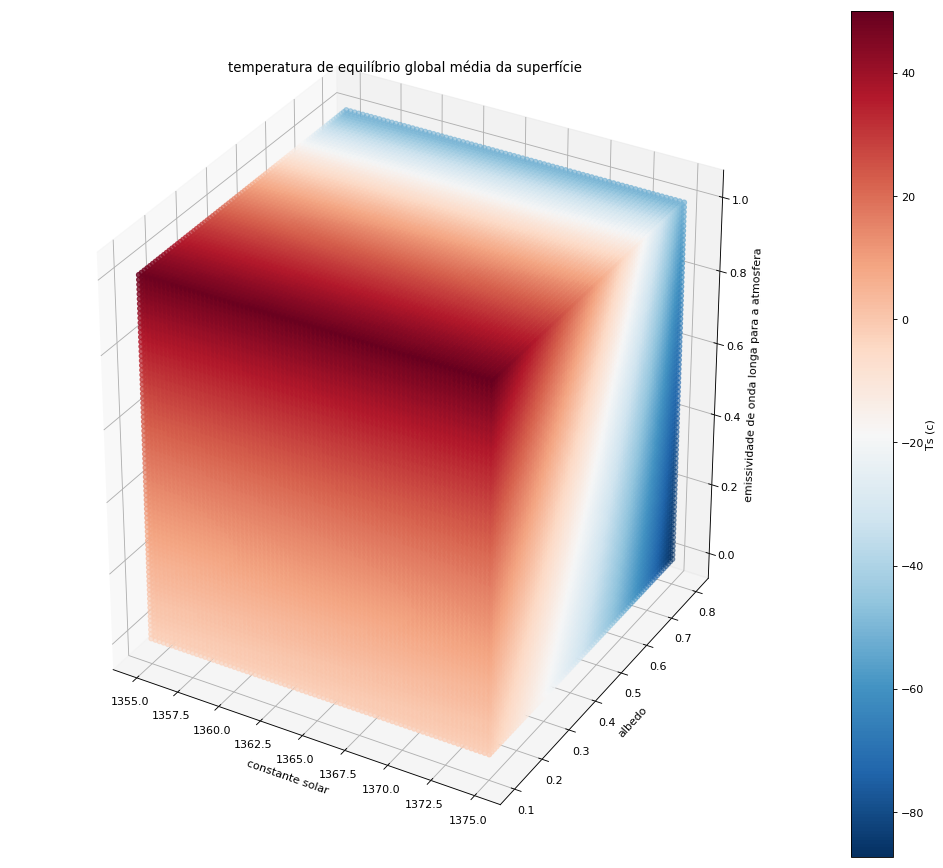

In [47]:
#notebook qt
#inline#
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
p = ax.scatter(saet[:,0], saet[:,1],saet[:,2], c=saet[:,3],cmap='RdBu_r')
ax.set_title("temperatura de equilíbrio global média da superfície")
ax.set_ylabel("albedo")
ax.set_zlabel("emissividade de onda longa para a atmosfera")
ax.set_xlabel("constante solar")
#ax.set_clim(-60,60)
cbar=fig.colorbar(p)
cbar.set_label("Ts (c)", labelpad=+1)
plt.show()

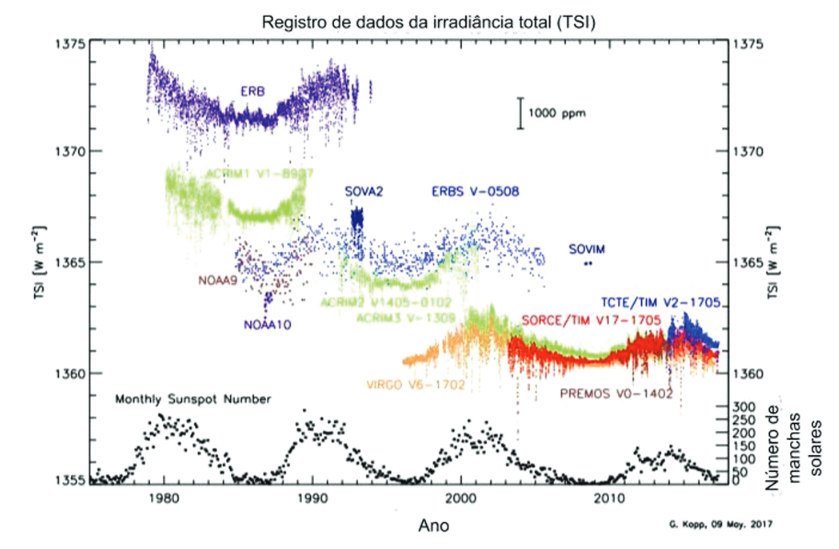

http://www.scielo.br/pdf/rbef/v40n3/1806-9126-RBEF-40-3-e3312.pdf

In [63]:
def Q(s=136,a=0.3,e=0.775111415580796,g=5.67*10**-8):
    e_=1-(e/2)
    return ((s/4)*(1-a))-(e_*g*(Ts(s,a,e,g)+273.15)**4)

Q()

3.552713678800501e-15

In [64]:
saeq  = []
for s_ in s:
    for a_ in a:
        for e_ in e:
            saeq.append([s_,a_,e_,Q(s=s_,a=a_,e=e_)])

saeq=np.array(saeq) 

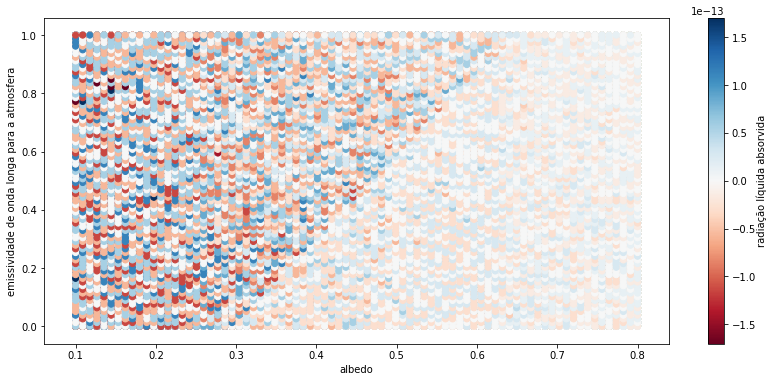

In [65]:
fig=plt.figure(figsize=(14, 6))
p = plt.scatter(saeq[:,1], saeq[:,2], c=saeq[:,3],cmap='RdBu')
plt.xlabel("albedo")
plt.ylabel("emissividade de onda longa para a atmosfera")
cbar=plt.colorbar(p)
cbar.set_label("radiação líquida absorvida", labelpad=+1)
plt.show()